In [1]:
import torch
from watermark.auto_watermark import AutoWatermark
from utils.transformers_config import TransformersConfig
from transformers import AutoModelForCausalLM, AutoTokenizer
import attack
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"


/home/aroma/miniconda3/envs/wm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transformers_config = TransformersConfig(
    model=AutoModelForCausalLM.from_pretrained('Qwen/Qwen2.5-0.5B').to(device),
    tokenizer=AutoTokenizer.from_pretrained('Qwen/Qwen2.5-0.5B'),
    # vocab_size=50272,
    device=device,
    # max_new_tokens=120,
    # min_length=20,
    # do_sample=True,
    # no_repeat_ngram_size=4
)


In [3]:
wm1 = AutoWatermark.load(
    'KGW', 
    algorithm_config='config/KGW.json',
    transformers_config=transformers_config
)
wm2 = AutoWatermark.load(
    'KGW', 
    algorithm_config='config/KGW_.json',
    transformers_config=transformers_config
)

In [4]:
prompt1 ="Give me a short introduction to large language model.\n"
wm=attack.Watermarker(wm1)
wm1_ans,sc = wm.generate_wm_text(prompt1)
print(wm1_ans)
print(sc)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A large language model, also known as a deep learning model, is a type of machine learning model that uses deep neural networks to process and analyze large amounts of data. These models are trained on large amounts of data, such as the internet or text, and can learn complex language patterns and structures from this data. Large language models are used in various applications, such as chatbots, language translation, and text generation.
5.597977259474208


In [5]:
rewriter=attack.RewirteAttacker(lm=wm1,attacker_lm=wm2)
ans,sc2=rewriter.attack(wm1_ans)
print(ans)
print(sc2)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A large language model, also known as a deep learning model, is a type of machine learning model that utilizes deep neural networks to process and analyze vast quantities of data. These models are trained on large datasets, such as the internet or text, and are capable of discovering intricate language patterns and structures in this data. Large language models are widely employed in various fields, including chatbots, language translation, and text generation.
3.841749099639162


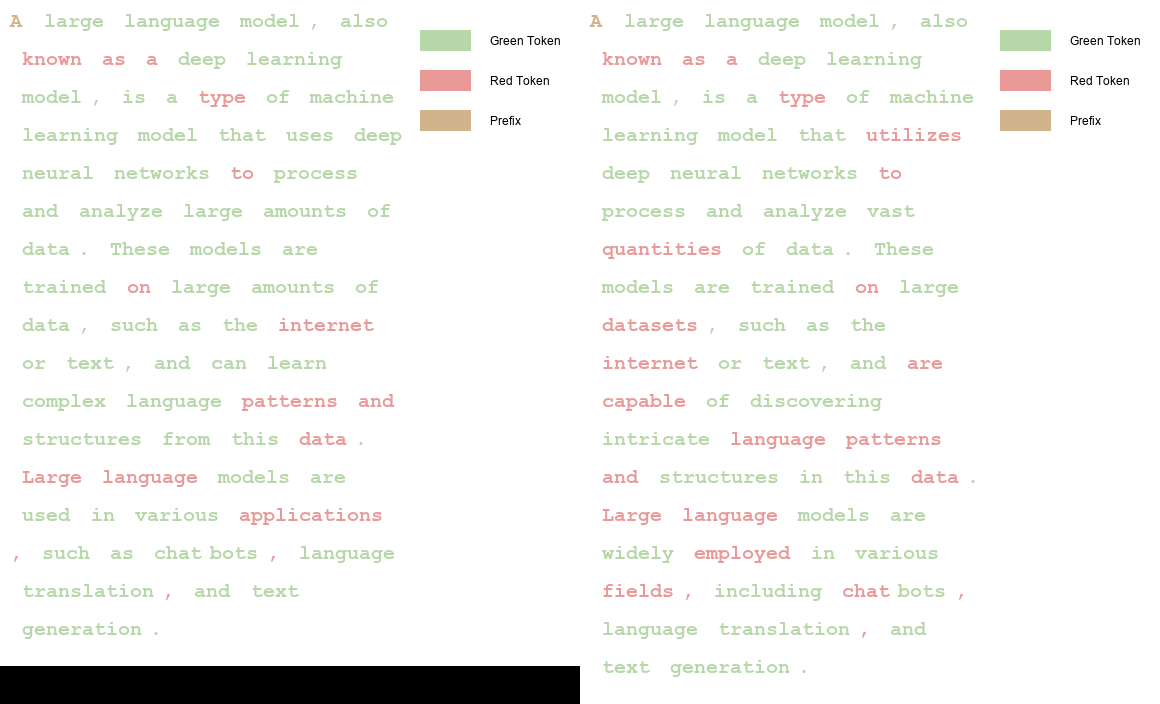

In [6]:
attack.Watermarker.contact_viz(
    wm.viz(wm1_ans,savepath='viz/KGW_pre.png'),
    wm.viz(ans,savepath='viz/KGW_post.png')
)